In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data2013 = pd.read_csv("data/EmpComp2013.csv")
data2014 = pd.read_csv("data/EmpComp2014.csv")
data2015 = pd.read_csv("data/EmpComp2015.csv")
data2016 = pd.read_csv("data/EmpComp2016.csv")
data2017 = pd.read_csv("data/EmpComp2017.csv")
data2018 = pd.read_csv("data/EmpComp2018.csv", encoding='ISO-8859-1') #strange problem
data2019 = pd.read_csv("data/EmpComp2019.csv")
data2020 = pd.read_csv("data/EmpComp2020.csv")
data2021 = pd.read_csv("data/EmpComp2021.csv")
data2022 = pd.read_csv("data/EmpComp2022.csv")
data2023 = pd.read_csv("data/EmpComp2023.csv")
data2023

,_id,Name,Department,Job Title (as of 12/31/23),Total Cash Compensation,Base Pay,Overtime,Sick and Vacation Payouts,Other Cash Compensation,Defined Contribution Plan Contributions - City Paid,Medical Dental Vision,Retirement Contributions (Normal Cost) - City Paid,"Long Term Disability, Life, Medicare",Misc Employment Related Costs
0,1,Maximillian Duenas,Fire,Fire Captain,"620,986.55","180,574.29","436,373.06",NaN,"4,039.20",NaN,"22,116.00","60,712.75","8,942.92",NaN
1,2,Galvin Charekian,Fire,Fire Captain,"505,127.13","180,574.29","309,358.34",NaN,"15,194.50",NaN,"22,116.00","61,058.80","7,295.65",NaN
2,3,Ali Miri,Police,Police Lieutenant,"457,417.50","201,148.00","218,841.40",NaN,"37,428.10",NaN,"22,116.00","71,198.76","6,631.66",NaN
3,4,Martin Mora,Fire,Fire Engineer,"453,006.39","157,370.85","291,596.34",NaN,"4,039.20",NaN,"22,116.00","53,034.70","6,495.84",NaN
4,5,Spencer Piercy,Fire,Fire Engineer,"446,067.98","157,370.85","287,852.25",NaN,844.88,NaN,"9,899.52","24,354.92","6,503.44",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,8642,Sammy Aguirre,Environmental Services,Water Systems Operator I,12.52,NaN,NaN,12.52,NaN,NaN,NaN,NaN,0.18,NaN
8642,8643,Jazmin Delgado,Public Works,Animal Care Attendant I PT,7.80,NaN,NaN,7.80,NaN,NaN,NaN,NaN,0.11,NaN
8643,8644,Marissa Boyd,Parks/Rec & Neigh Serv P R N S,Recreation Leader PT,6.61,6.61,NaN,NaN,NaN,0.25,NaN,NaN,0.10,NaN
8644,8645,Adriana Imbre,Environmental Services,Assoc Environ Serv Spec,2.77,NaN,NaN,2.77,NaN,NaN,NaN,NaN,0.04,NaN


In [3]:
data2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8646 entries, 0 to 8645
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   _id                                                  8646 non-null   int64  
 1   Name                                                 8646 non-null   object 
 2   Department                                           8646 non-null   object 
 3   Job Title (as of 12/31/23)                           8646 non-null   object 
 4   Total Cash Compensation                              8646 non-null   object 
 5   Base Pay                                             8581 non-null   object 
 6   Overtime                                             4815 non-null   object 
 7   Sick and Vacation Payouts                            1009 non-null   object 
 8   Other Cash Compensation                              7485 non-null  

In [4]:
# objects to strings
data2023['Department'] = data2023['Department'].astype("string")
data2023['Name'] = data2023['Name'].astype("string")
data2023['Job Title (as of 12/31/23)'] = data2023['Job Title (as of 12/31/23)'].astype("string")

# objects to numbers
data2023['Total Cash Compensation'] = pd.to_numeric(data2023['Total Cash Compensation'], errors='coerce')
data2023['Base Pay'] = pd.to_numeric(data2023['Base Pay'], errors='coerce')
data2023['Overtime'] = pd.to_numeric(data2023['Overtime'], errors='coerce')
data2023['Sick and Vacation Payouts'] = pd.to_numeric(data2023['Sick and Vacation Payouts'], errors='coerce')
data2023['Other Cash Compensation'] = pd.to_numeric(data2023['Other Cash Compensation'], errors='coerce')
data2023['Defined Contribution Plan Contributions - City Paid'] = pd.to_numeric(data2023['Defined Contribution Plan Contributions - City Paid'], errors='coerce')
data2023['Medical Dental Vision'] = pd.to_numeric(data2023['Medical Dental Vision'], errors='coerce')
data2023['Retirement Contributions (Normal Cost) - City Paid'] = pd.to_numeric(data2023['Retirement Contributions (Normal Cost) - City Paid'], errors='coerce')
data2023['Long Term Disability, Life, Medicare'] = pd.to_numeric(data2023['Long Term Disability, Life, Medicare'], errors='coerce')
data2023['Misc Employment Related Costs'] = pd.to_numeric(data2023['Misc Employment Related Costs'], errors='coerce')

In [5]:
data2023.Department.unique()

<StringArray>
[                          'Fire',                         'Police',
                   'City Manager',            'Retirement Services',
                       'Attorney',                        'Airport',
         'Environmental Services', 'Office Of Economic Development',
                        'Library', 'Parks/Rec & Neigh Serv P R N S',
                 'Transportation',    'Community Energy Department',
         'Planning/Building/Code',                   'Public Works',
         'Information Technology',                        'Finance',
     'Independent Police Auditor',                        'Auditor',
                'Human Resources',                        'Housing',
                          'Clerk',                   'City Council']
Length: 22, dtype: string

In [6]:
#null values for each column
print(data2023.isnull().sum())

_id                                                       0
Name                                                      0
Department                                                0
Job Title (as of 12/31/23)                                0
Total Cash Compensation                                8522
Base Pay                                               8510
Overtime                                               7203
Sick and Vacation Payouts                              8486
Other Cash Compensation                                6793
Defined Contribution Plan Contributions - City Paid    6735
Medical Dental Vision                                  7790
Retirement Contributions (Normal Cost) - City Paid     8470
Long Term Disability, Life, Medicare                   5436
Misc Employment Related Costs                          6566
dtype: int64


In [7]:
print(data2023[['Total Cash Compensation', 'Base Pay', 'Overtime', 'Other Cash Compensation']].describe())

       Total Cash Compensation    Base Pay     Overtime  \
count               124.000000  136.000000  1443.000000   
mean                412.841613  374.661618   346.794754   
std                 316.209454  342.989599   259.442240   
min                   1.750000 -916.100000  -939.860000   
25%                 139.007500  119.735000   158.700000   
50%                 368.950000  304.495000   277.730000   
75%                 686.635000  672.465000   498.695000   
max                 994.220000  994.220000   996.460000   

       Other Cash Compensation  
count              1853.000000  
mean                378.511274  
std                 220.735061  
min                 -92.780000  
25%                 300.000000  
50%                 300.000000  
75%                 500.000000  
max                 998.670000  


In [8]:
print(data2023['Department'].value_counts())

Department
Police                            1951
Parks/Rec & Neigh Serv P R N S    1732
Fire                               835
Public Works                       756
Library                            641
Environmental Services             581
Transportation                     576
Planning/Building/Code             304
Airport                            232
City Council                       154
Finance                            141
Information Technology             132
Housing                            117
City Manager                       106
Attorney                            97
Office Of Economic Development      75
Human Resources                     68
Retirement Services                 54
Community Energy Department         51
Clerk                               20
Auditor                             14
Independent Police Auditor           9
Name: count, dtype: Int64


In [9]:
print(data2023['Department'].value_counts().head(15))

#note: a lot of jobs listed only have a single entry: print(data2023['Department'].value_counts().tail(15))

Department
Police                            1951
Parks/Rec & Neigh Serv P R N S    1732
Fire                               835
Public Works                       756
Library                            641
Environmental Services             581
Transportation                     576
Planning/Building/Code             304
Airport                            232
City Council                       154
Finance                            141
Information Technology             132
Housing                            117
City Manager                       106
Attorney                            97
Name: count, dtype: Int64


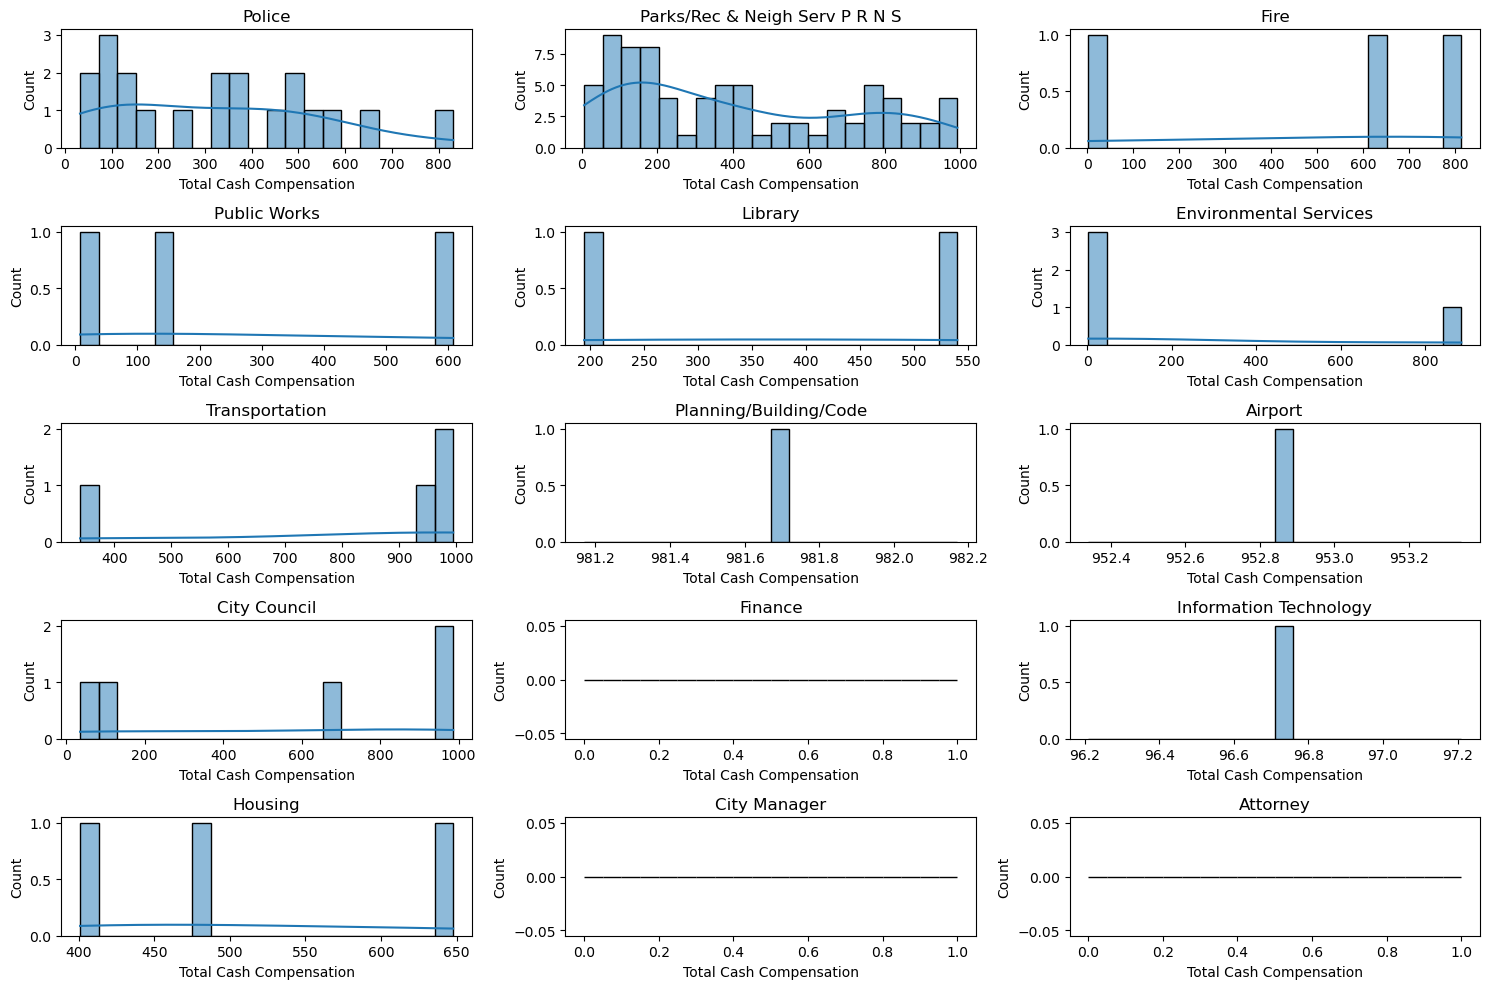

In [10]:
top_jobs = data2023['Department'].value_counts().head(15).index

data2023_top_jobs = data2023[data2023['Department'].isin(top_jobs)]

plt.figure(figsize=(15, 10))

for i, job in enumerate(top_jobs, 1):
    plt.subplot(5, 3, i) 
    sns.histplot(data2023_top_jobs[data2023_top_jobs['Department'] == job]['Total Cash Compensation'], kde=True, bins=20)
    plt.title(job)
    plt.xlabel('Total Cash Compensation')
    plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
# Check if it worked by printing the data type
print(data2023['Department'].dtype)

print(data2023['Base Pay'].dtype)


string
float64


In [12]:
data2023_top_jobs

,_id,Name,Department,Job Title (as of 12/31/23),Total Cash Compensation,Base Pay,Overtime,Sick and Vacation Payouts,Other Cash Compensation,Defined Contribution Plan Contributions - City Paid,Medical Dental Vision,Retirement Contributions (Normal Cost) - City Paid,"Long Term Disability, Life, Medicare",Misc Employment Related Costs
0,1,Maximillian Duenas,Fire,Fire Captain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Galvin Charekian,Fire,Fire Captain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Ali Miri,Police,Police Lieutenant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Martin Mora,Fire,Fire Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Spencer Piercy,Fire,Fire Engineer,NaN,NaN,NaN,NaN,844.88,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,8642,Sammy Aguirre,Environmental Services,Water Systems Operator I,12.52,NaN,NaN,12.52,NaN,NaN,NaN,NaN,0.18,NaN
8642,8643,Jazmin Delgado,Public Works,Animal Care Attendant I PT,7.80,NaN,NaN,7.80,NaN,NaN,NaN,NaN,0.11,NaN
8643,8644,Marissa Boyd,Parks/Rec & Neigh Serv P R N S,Recreation Leader PT,6.61,6.61,NaN,NaN,NaN,0.25,NaN,NaN,0.10,NaN
8644,8645,Adriana Imbre,Environmental Services,Assoc Environ Serv Spec,2.77,NaN,NaN,2.77,NaN,NaN,NaN,NaN,0.04,NaN


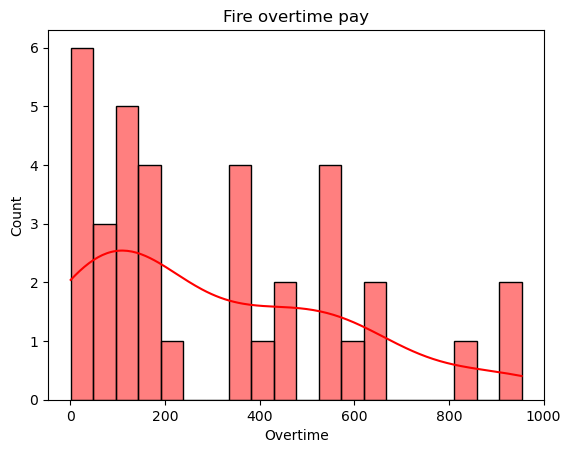

In [13]:
sns.histplot(data=data2023[data2023['Department'] == 'Fire'], x='Overtime', kde=True, bins=20, color = 'red')
plt.title("Fire overtime pay")
plt.show()


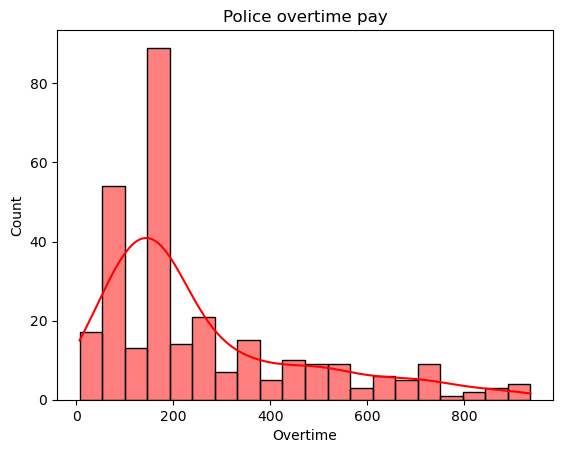

-939.86
1


In [14]:
sns.histplot(data=data2023[(data2023['Department'] == 'Police') & (data2023['Overtime'] > 0)], 
             x='Overtime', bins = 20, kde=True, color = 'red')
plt.title("Police overtime pay")
plt.show()

print(data2023[data2023['Department'] == 'Police']['Overtime'].min())
# how can someone lose money working overtime????????????????????
print(data2023[(data2023['Department'] == 'Police') & (data2023['Overtime'] < 0)].shape[0])
#there's only one entry like this so it's prob an error

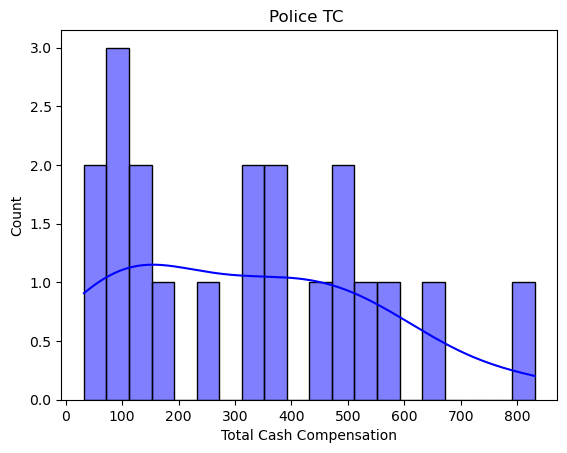

In [15]:
sns.histplot(data=data2023[(data2023['Department'] == 'Police') & (data2023['Total Cash Compensation'] > 0)], 
             x='Total Cash Compensation', bins = 20, kde=True, color = 'blue')
plt.title("Police TC ")
plt.show()

In [16]:
# Convert 'Department' to string for each year's data
data2013['Department Name'] = data2013['Department Name'].astype("string")
data2014['Department Name'] = data2014['Department Name'].astype("string")
data2015['Department'] = data2015['Department'].astype("string")
data2016['Department'] = data2016['Department'].astype("string")
data2017['Department'] = data2017['Department'].astype("string")
data2018['Department'] = data2018['Department'].astype("string")
data2019['Department'] = data2019['Department'].astype("string")
data2020['Department'] = data2020['Department'].astype("string")
data2021['Department'] = data2021['Department'].astype("string")
data2022['Department'] = data2022['Department'].astype("string")
data2023['Department'] = data2023['Department'].astype("string")

# Convert 'Total Cash Compensation' to string, remove commas, and then to numeric for each year's data
data2013['Total Cash Compensation'] = pd.to_numeric(data2013['Total Cash Compensation'].astype(str).str.replace(',', ''), errors='coerce')
data2014['Total Cash Compensation'] = pd.to_numeric(data2014['Total Cash Compensation'].astype(str).str.replace(',', ''), errors='coerce')
data2015['Total Cash Compensation'] = pd.to_numeric(data2015['Total Cash Compensation'].astype(str).str.replace(',', ''), errors='coerce')
data2016['Total Cash Compensation'] = pd.to_numeric(data2016['Total Cash Compensation'].astype(str).str.replace(',', ''), errors='coerce')
data2017['Total Cash Compensation'] = pd.to_numeric(data2017['Total Cash Compensation'].astype(str).str.replace(',', ''), errors='coerce')
data2018['Total Cash Compensation'] = pd.to_numeric(data2018['Total Cash Compensation'].astype(str).str.replace(',', ''), errors='coerce')
data2019['Total Cash Compensation'] = pd.to_numeric(data2019['Total Cash Compensation'].astype(str).str.replace(',', ''), errors='coerce')
data2020['Total Cash Compensation'] = pd.to_numeric(data2020['Total Cash Compensation'].astype(str).str.replace(',', ''), errors='coerce')
data2021['Total Cash Compensation'] = pd.to_numeric(data2021['Total Cash Compensation'].astype(str).str.replace(',', ''), errors='coerce')
data2022['Total Cash Compensation'] = pd.to_numeric(data2022['Total Cash Compensation'].astype(str).str.replace(',', ''), errors='coerce')
data2023['Total Cash Compensation'] = pd.to_numeric(data2023['Total Cash Compensation'].astype(str).str.replace(',', ''), errors='coerce')


In [17]:
police_departments = [
    'Police-Field Patrol', 
    'Police-Police Crossing Guards', 
    'Police-Commun, non-Sworn', 
    'Police-Records & Id Non-Sworn', 
    'Police-Recruit Training', 
    'Police-CommunityServiceOfficer', 
    'Police-Bur Of Invest Non-Sworn'
]

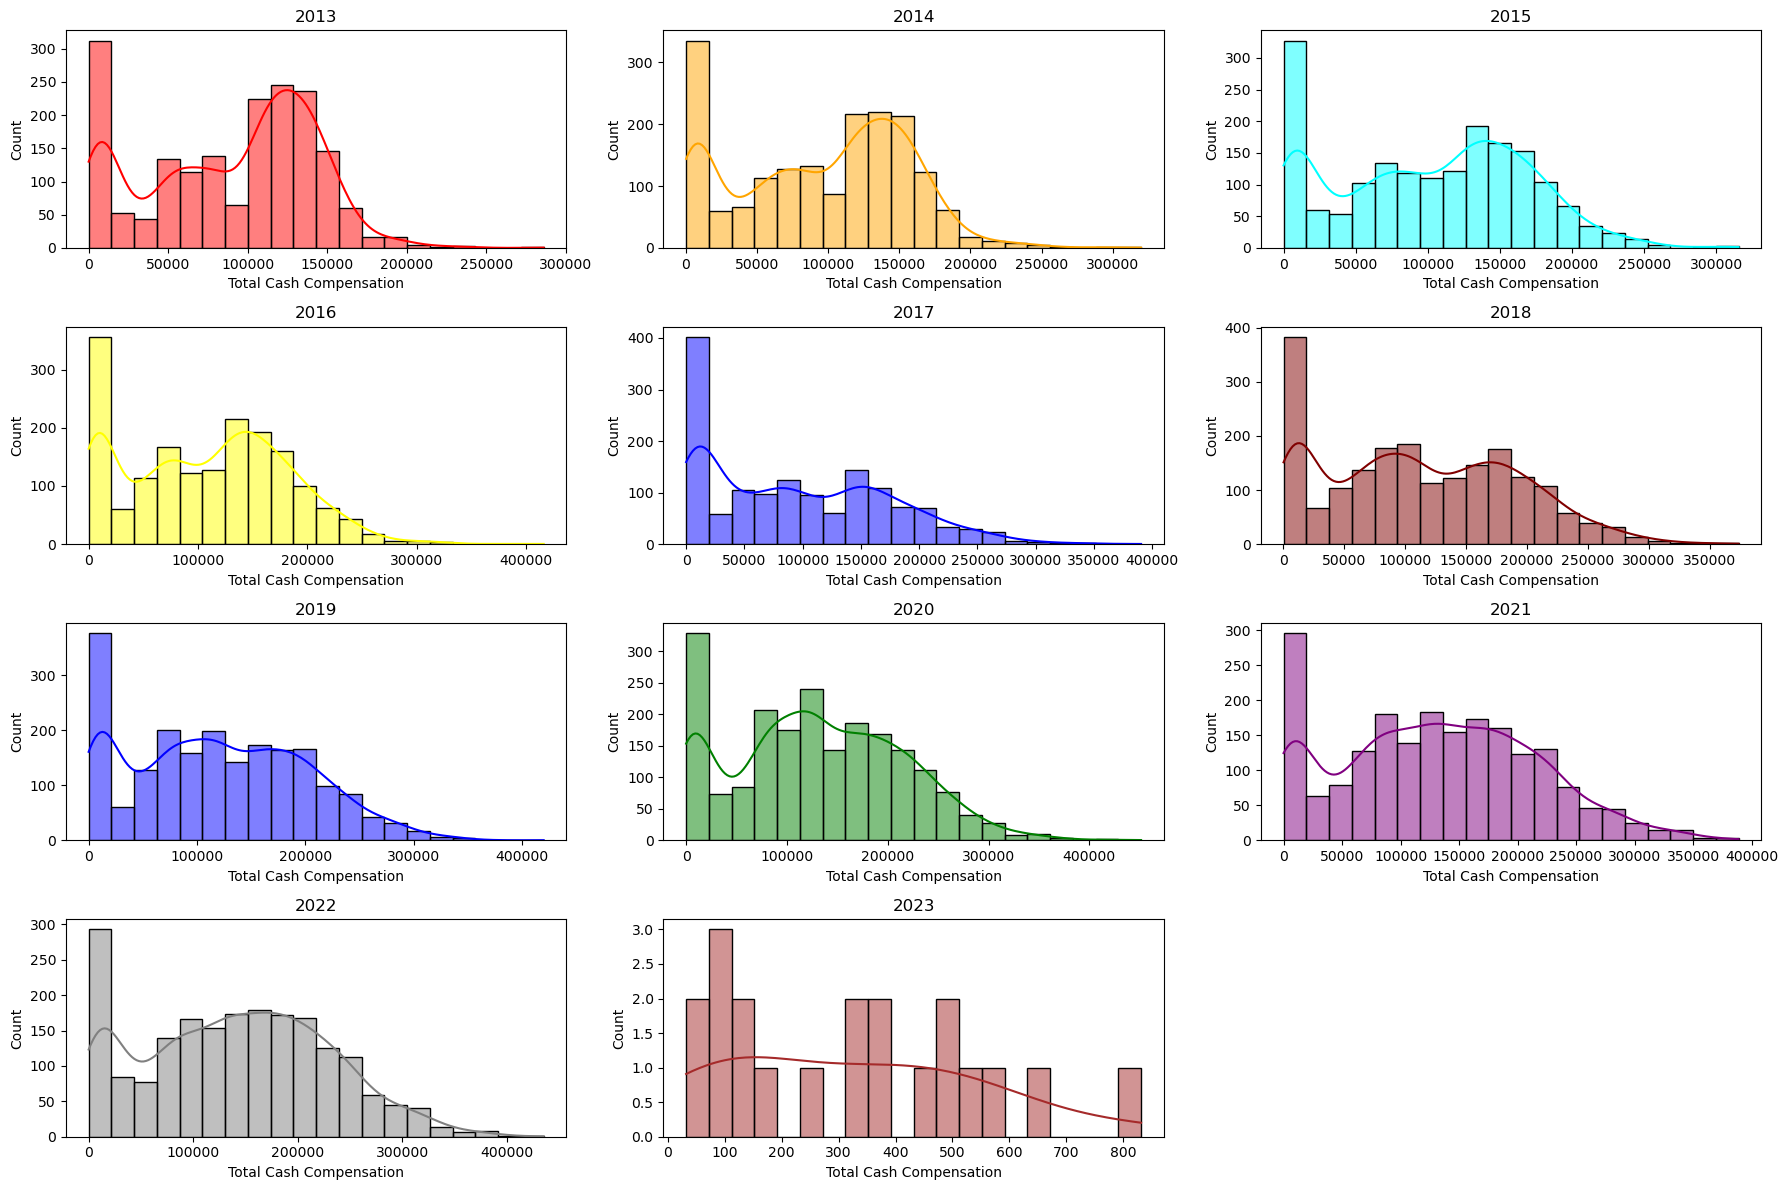

In [18]:
plt.figure(figsize=(18, 12))

plt.subplot(4, 3, 1) 
sns.histplot(data=data2013[(data2013['Department Name'] == 'Police') & (data2013['Total Cash Compensation'] > 0)], 
             x='Total Cash Compensation', bins=20, kde=True, color='red')
plt.title("2013")

plt.subplot(4, 3, 2) 
sns.histplot(data=data2014[(data2014['Department Name'] == 'Police') & (data2014['Total Cash Compensation'] > 0)], 
             x='Total Cash Compensation', bins=20, kde=True, color='orange')
plt.title("2014")

plt.subplot(4, 3, 3) 
sns.histplot(data=data2015[(data2015['Department'] == 'Police') & (data2015['Total Cash Compensation'] > 0)], 
             x='Total Cash Compensation', bins=20, kde=True, color='cyan')
plt.title("2015")

plt.subplot(4, 3, 4) 
sns.histplot(data=data2016[(data2016['Department'] == 'Police') & (data2016['Total Cash Compensation'] > 0)], 
             x='Total Cash Compensation', bins=20, kde=True, color='yellow')
plt.title("2016")

# SPECIAL FIX FOR 2017 CAUSE WE LOVE GOVERNMENT DATA YEAHHHHHH WOOOOOO
plt.subplot(4, 3, 5) 
sns.histplot(data=data2017[
    (data2017['Department'].isin(police_departments)) & 
    (data2017['Total Cash Compensation'] > 0)
], 
x='Total Cash Compensation', bins=20, kde=True, color='blue')
plt.title("2017")

plt.subplot(4, 3, 6) 
sns.histplot(data=data2018[(data2018['Department'] == 'Police') & (data2018['Total Cash Compensation'] > 0)], 
             x='Total Cash Compensation', bins=20, kde=True, color='maroon')
plt.title("2018")

plt.subplot(4, 3, 7) 
sns.histplot(data=data2019[(data2019['Department'] == 'Police') & (data2019['Total Cash Compensation'] > 0)], 
             x='Total Cash Compensation', bins=20, kde=True, color='blue')
plt.title("2019")

plt.subplot(4, 3, 8) 
sns.histplot(data=data2020[(data2020['Department'] == 'Police') & (data2020['Total Cash Compensation'] > 0)], 
             x='Total Cash Compensation', bins=20, kde=True, color='green')
plt.title("2020")

plt.subplot(4, 3, 9) 
sns.histplot(data=data2021[(data2021['Department'] == 'Police') & (data2021['Total Cash Compensation'] > 0)], 
             x='Total Cash Compensation', bins=20, kde=True, color='purple')
plt.title("2021")

plt.subplot(4, 3, 10) 
sns.histplot(data=data2022[(data2022['Department'] == 'Police') & (data2022['Total Cash Compensation'] > 0)], 
             x='Total Cash Compensation', bins=20, kde=True, color='grey')
plt.title("2022")

plt.subplot(4, 3, 11) 
sns.histplot(data=data2023[(data2023['Department'] == 'Police') & (data2023['Total Cash Compensation'] > 0)], 
             x='Total Cash Compensation', bins=20, kde=True, color='brown')
plt.title("2023") # this one is broken for now

plt.tight_layout()
plt.show()

In [19]:
print(data2017['Department'].value_counts().head(60))

# adding up all the police related fields from the department on this list in the top 60 departments
# by entry gives us 1446, which is condierably smaller than in 2016 and 2018 where we would expect similar numbers

Department
Police-Field Patrol               687
Police-Police Crossing Guards     296
Police-Commun, non-Sworn          169
Plan/Bldg/Code-Building Div       168
Plan/Bldg/Code-Enforcement Div    155
PW-Animal Services                129
PRNS (RCS)-Camden Comm Ctr        110
Police-Records & Id Non-Sworn     109
ESD-WPC/Maint                     101
Fire-Station 1                     98
Fire-Station 13                    97
Fire-Station 2                     93
Attorney-Full Time                 92
Plan/Bldg/Code-Full-Time           87
Fire-Station 10                    86
Police-Recruit Training            86
Fire-Federated Full-Time           81
PRNS (RCS)-Almaden Comm Ctr        77
PW-ES CMS                          74
Housing-Full-Time                  71
DOT/On-Street Parking Svcs         70
ESD-WPC/Plant Opns                 70
PRNS (RCS)-Neighborhood Serv       70
Info Tech-Full-Time                69
Fire-Communications  Non-Sworn     67
PRNS (RCS)-Roosevelt Comm Ctr      64
P

In [20]:
print(data2016['Department'].value_counts().head(15))

Department
Police                            1756
Parks/Rec & Neigh Serv P R N S    1534
Fire                               820
Library                            723
Public Works                       643
Environmental Services             511
Transportation                     508
Planning/Building/Code             409
Airport                            199
Finance                            143
City Council                       121
Attorney                            90
Information Technology              89
Office Of Economic Development      75
City Manager                        74
Name: count, dtype: Int64


In [21]:
print(data2018['Department'].value_counts().head(15))

Department
Police                            2000
Parks/Rec & Neigh Serv P R N S    1636
Fire                               820
Public Works                       672
Library                            633
Environmental Services             546
Transportation                     536
Planning/Building/Code             334
Airport                            236
Finance                            134
City Council                       133
City Manager                        96
Attorney                            96
Information Technology              88
Office Of Economic Development      74
Name: count, dtype: Int64


In [22]:
filtered_data = data2023.loc[
    (data2023['Department'] == 'Police') & 
    (data2023['Total Cash Compensation'] > 0),
    ['Department', 'Job Title (as of 12/31/23)', 'Total Cash Compensation']
]

print(filtered_data)
# not sure why the TCC is broken here, will fix later :(

# data2023['Total Cash Compensation'] = pd.to_numeric(data2023['Total Cash Compensation'].astype(str).str.replace(',', ''), errors='coerce')


# this line is the same as all the others and is the same style of data in the CSV's, so idk whats up :(

     Department      Job Title (as of 12/31/23)  Total Cash Compensation
8542     Police  Temp Employee Retiree U Non-Ex                   831.04
8556     Police          Police Data Spec II PT                   643.51
8560     Police                  Police Recruit                   586.46
8564     Police                  Police Recruit                   535.81
8567     Police        School Crossing Guard PT                   489.32
8568     Police                  Police Officer                   481.12
8574     Police        School Crossing Guard PT                   438.76
8580     Police        School Crossing Guard PT                   380.07
8581     Police        School Crossing Guard PT                   378.79
8589     Police        School Crossing Guard PT                   317.41
8591     Police                  Police Officer                   316.86
8593     Police                  Police Officer                   237.25
8606     Police        School Crossing Guard PT    